In [32]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.discriminant_analysis import StandardScaler

In [55]:
# Load dataset
iris=load_iris()
X = iris.data[:, [0, 2]] # Select Sepal length (2) and Petal length (3)
target = iris.target
y = (target == 0).astype(int) # 1 if Setosa, else 0

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [57]:
lg = LogisticRegression()
lg.fit(X_train_std, y_train)

LogisticRegression()

In [58]:
y_pred = lg.predict(X_test_std)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0
Confusion Matrix:
 [[20  0]
 [ 0 10]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



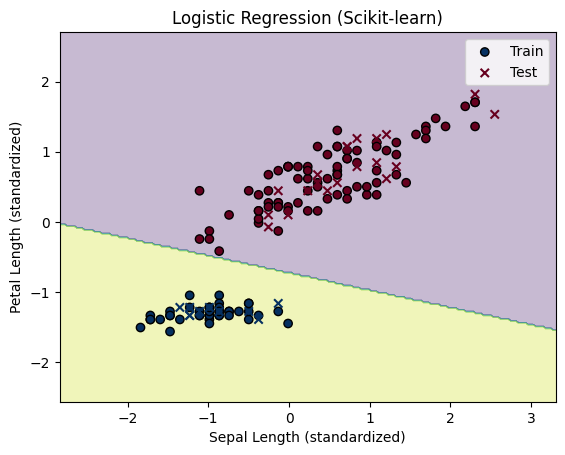

In [61]:
# Create a meshgrid
x1_min, x1_max = X_train_std[:, 0].min()-1, X_train_std[:, 0].max()+1
x2_min, x2_max = X_train_std[:, 1].min()-1, X_train_std[:, 1].max()+1
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 200),
                     np.linspace(x2_min, x2_max, 200))

# Predict over grid
grid = np.c_[xx.ravel(), yy.ravel()]
Z = lg.predict(grid)
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], c=y_train, edgecolors='k', cmap="RdBu", label="Train")
plt.scatter(X_test_std[:, 0], X_test_std[:, 1], c=y_test, marker='x', cmap="RdBu", label="Test")
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Petal Length (standardized)")
plt.title("Logistic Regression (Scikit-learn)")
plt.legend()
plt.show()